In [24]:
import pandas as pd

data = pd.read_csv("C:/Users/bhuky/Downloads/nifty50_closing_prices.csv")

print(data.head())

                        Date  RELIANCE.NS  HDFCBANK.NS  ICICIBANK.NS  \
0  2024-08-20 00:00:00+05:30  2991.899902  1637.699951   1179.449951   
1  2024-08-21 00:00:00+05:30  2997.350098  1625.800049   1174.849976   
2  2024-08-22 00:00:00+05:30  2996.250000  1631.300049   1191.099976   
3  2024-08-23 00:00:00+05:30  2999.949951  1625.050049   1203.500000   
4  2024-08-26 00:00:00+05:30  3025.199951  1639.949951   1213.300049   

       INFY.NS       TCS.NS  KOTAKBANK.NS  HINDUNILVR.NS      ITC.NS  \
0  1872.199951  4523.299805   1805.650024    2751.050049  498.799988   
1  1872.699951  4551.500000   1812.949951    2791.199951  505.399994   
2  1880.250000  4502.000000   1821.500000    2792.800049  504.549988   
3  1862.099976  4463.899902   1818.000000    2815.600098  505.799988   
4  1876.150024  4502.450195   1812.500000    2821.149902  505.700012   

         LT.NS  ...  HEROMOTOCO.NS   DRREDDY.NS   SHREECEM.NS  BRITANNIA.NS  \
0  3572.699951  ...    5244.399902  6965.350098  24730.

In [6]:
#Before moving forward, I’ll convert the date column into a datetime data type:


In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [25]:
#Now, let’s have a look at whether this data has any null values or not:
print(data.isnull().sum())

Date              0
RELIANCE.NS       0
HDFCBANK.NS       0
ICICIBANK.NS      0
INFY.NS           0
TCS.NS            0
KOTAKBANK.NS      0
HINDUNILVR.NS     0
ITC.NS            0
LT.NS             0
SBIN.NS           0
BAJFINANCE.NS     0
BHARTIARTL.NS     0
HCLTECH.NS        0
ASIANPAINT.NS     0
AXISBANK.NS       0
DMART.NS          0
MARUTI.NS         0
ULTRACEMCO.NS     0
HDFC.NS          24
TITAN.NS          0
SUNPHARMA.NS      0
M&M.NS            0
NESTLEIND.NS      0
WIPRO.NS          0
ADANIGREEN.NS     0
TATASTEEL.NS      0
JSWSTEEL.NS       0
POWERGRID.NS      0
ONGC.NS           0
NTPC.NS           0
COALINDIA.NS      0
BPCL.NS           0
IOC.NS            0
TECHM.NS          0
INDUSINDBK.NS     0
DIVISLAB.NS       0
GRASIM.NS         0
CIPLA.NS          0
BAJAJFINSV.NS     0
TATAMOTORS.NS     0
HEROMOTOCO.NS     0
DRREDDY.NS        0
SHREECEM.NS       0
BRITANNIA.NS      0
UPL.NS            0
EICHERMOT.NS      0
SBILIFE.NS        0
ADANIPORTS.NS     0
BAJAJ-AUTO.NS     0


In [12]:
data.bfill(inplace=True)

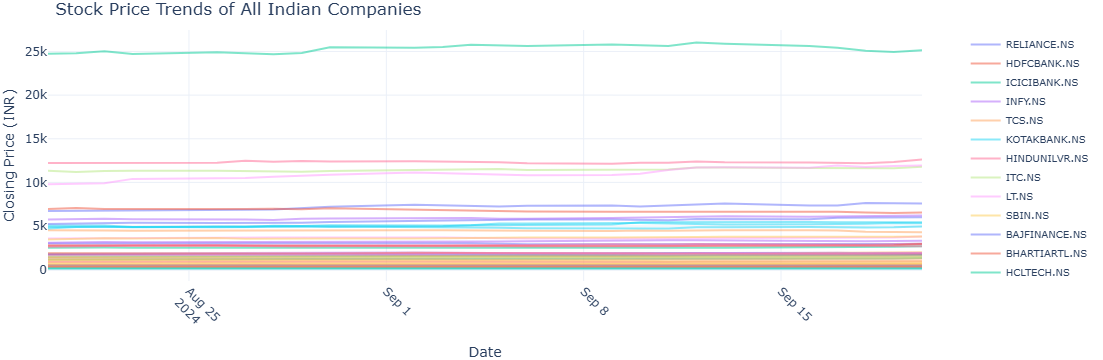

In [31]:
import plotly.graph_objs as go
import plotly.express as px

fig = go.Figure()

for company in data.columns[1:]:
    fig.add_trace(go.Scatter(x=data['Date'], y=data[company],
                             mode='lines',
                             name=company,
                             opacity=0.5))

fig.update_layout(
    title='Stock Price Trends of All Indian Companies',
    xaxis_title='Date',
    yaxis_title='Closing Price (INR)',
    xaxis=dict(tickangle=45), 
    legend=dict(
        x=1.05,
        y=1,
        traceorder="normal",
        font=dict(size=10),
        orientation="v"
    ),
    margin=dict(l=0, r=0, t=30, b=0),  
    hovermode='x',
    template='plotly_white'
)

fig.show()

In [14]:
all_companies = data.columns[1:]

volatility_all_companies = data[all_companies].std()

volatility_all_companies.sort_values(ascending=False).head(10)

BAJAJ-AUTO.NS    659.810841
SHREECEM.NS      429.919834
BAJFINANCE.NS    306.658594
DIVISLAB.NS      247.674895
HEROMOTOCO.NS    247.092728
DRREDDY.NS       175.124908
ULTRACEMCO.NS    172.673053
DMART.NS         155.593701
BRITANNIA.NS     144.164343
MARUTI.NS        109.587342
dtype: float64

In [22]:
growth_all_companies = data[all_companies].pct_change() * 100

average_growth_all_companies = growth_all_companies.mean()

average_growth_all_companies.sort_values(ascending=False).head(10)

C:\Users\bhuky\AppData\Local\Temp\ipykernel_12988\3798682943.py:1: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



BAJAJ-AUTO.NS    0.883421
BAJAJFINSV.NS    0.791730
BHARTIARTL.NS    0.735219
DIVISLAB.NS      0.634851
HEROMOTOCO.NS    0.602192
ICICIBANK.NS     0.557742
BAJFINANCE.NS    0.536819
TITAN.NS         0.393800
HINDUNILVR.NS    0.351634
BRITANNIA.NS     0.327747
dtype: float64

In [16]:
initial_prices_all = data[all_companies].iloc[0]
final_prices_all = data[all_companies].iloc[-1]

roi_all_companies = ((final_prices_all - initial_prices_all) / initial_prices_all) * 100

roi_all_companies.sort_values(ascending=False).head(10)


BAJAJ-AUTO.NS    22.107017
BAJAJFINSV.NS    19.642973
BHARTIARTL.NS    18.120965
DIVISLAB.NS      15.404976
HEROMOTOCO.NS    14.660402
ICICIBANK.NS     13.480860
BAJFINANCE.NS    12.797149
TITAN.NS          9.275089
HINDUNILVR.NS     8.235039
BRITANNIA.NS      7.713587
dtype: float64

In [ ]:
#Creating a Mutual Fund Plan Based on High ROI and Low Risk

In [17]:
roi_threshold = roi_all_companies.median()
volatility_threshold = volatility_all_companies.median()

selected_companies = roi_all_companies[(roi_all_companies > roi_threshold) & (volatility_all_companies < volatility_threshold)]

selected_companies.sort_values(ascending=False)

ICICIBANK.NS     13.480860
INDUSINDBK.NS     7.159914
JSWSTEEL.NS       7.021748
AXISBANK.NS       6.592466
HDFCBANK.NS       6.319839
SUNPHARMA.NS      5.627425
KOTAKBANK.NS      5.474481
CIPLA.NS          4.850117
NTPC.NS           4.356926
dtype: float64

In [18]:
selected_volatility = volatility_all_companies[selected_companies.index]
inverse_volatility = 1 / selected_volatility

investment_ratios = inverse_volatility / inverse_volatility.sum()

investment_ratios.sort_values(ascending=False)

NTPC.NS          0.280768
JSWSTEEL.NS      0.159985
AXISBANK.NS      0.092231
HDFCBANK.NS      0.089330
CIPLA.NS         0.084783
KOTAKBANK.NS     0.076642
INDUSINDBK.NS    0.074432
SUNPHARMA.NS     0.072553
ICICIBANK.NS     0.069276
dtype: float64

In [ ]:
#Analyzing Our Mutual Fund Plan

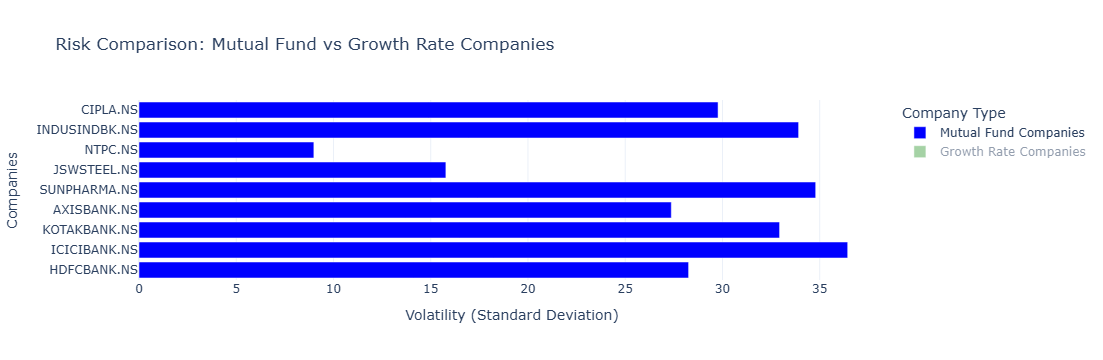

In [19]:
top_growth_companies = average_growth_all_companies.sort_values(ascending=False).head(10)
risk_growth_rate_companies = volatility_all_companies[top_growth_companies.index]
risk_mutual_fund_companies = volatility_all_companies[selected_companies.index]

fig = go.Figure()

fig.add_trace(go.Bar(
    y=risk_mutual_fund_companies.index,
    x=risk_mutual_fund_companies,
    orientation='h',  # Horizontal bar
    name='Mutual Fund Companies',
    marker=dict(color='blue')
))

fig.add_trace(go.Bar(
    y=risk_growth_rate_companies.index,
    x=risk_growth_rate_companies,
    orientation='h',  
    name='Growth Rate Companies',
    marker=dict(color='green'),
    opacity=0.7
))

fig.update_layout(
    title='Risk Comparison: Mutual Fund vs Growth Rate Companies',
    xaxis_title='Volatility (Standard Deviation)',
    yaxis_title='Companies',
    barmode='overlay',  
    legend=dict(title='Company Type'),
    template='plotly_white'
)

fig.show()

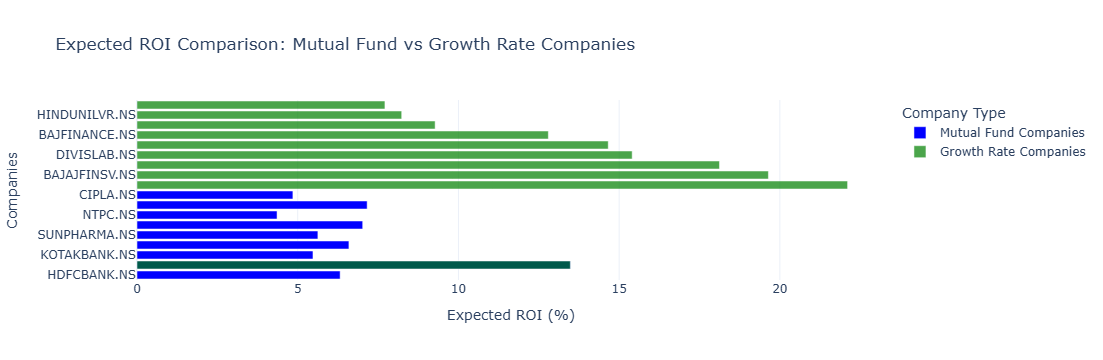

In [20]:
expected_roi_mutual_fund = roi_all_companies[selected_companies.index]

expected_roi_growth_companies = roi_all_companies[top_growth_companies.index]

fig = go.Figure()

fig.add_trace(go.Bar(
    y=expected_roi_mutual_fund.index,
    x=expected_roi_mutual_fund,
    orientation='h',  
    name='Mutual Fund Companies',
    marker=dict(color='blue')
))

fig.add_trace(go.Bar(
    y=expected_roi_growth_companies.index,
    x=expected_roi_growth_companies,
    orientation='h',  
    name='Growth Rate Companies',
    marker=dict(color='green'),
    opacity=0.7
))

fig.update_layout(
    title='Expected ROI Comparison: Mutual Fund vs Growth Rate Companies',
    xaxis_title='Expected ROI (%)',
    yaxis_title='Companies',
    barmode='overlay',  
    legend=dict(title='Company Type'),
    template='plotly_white'
)

fig.show()

In [ ]:
#Calculating Expected Returns

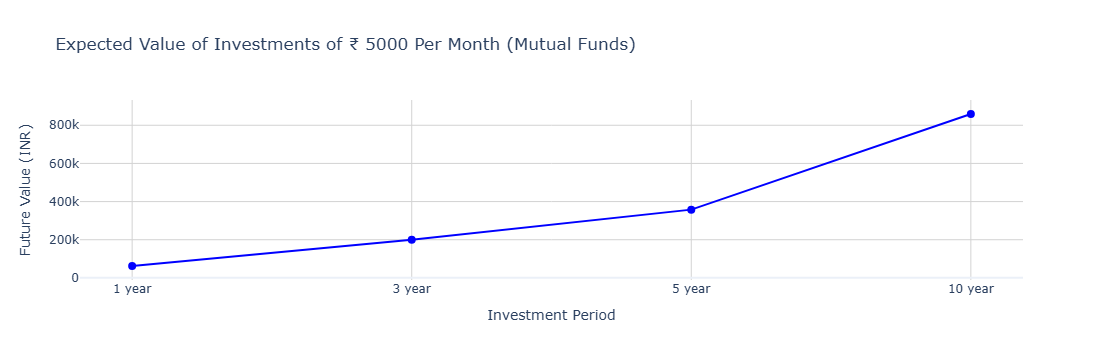

In [21]:
import numpy as np

monthly_investment = 5000  # Monthly investment in INR
years = [1, 3, 5, 10]  # Investment periods (in years)
n = 12  # Number of times interest is compounded per year (monthly)

avg_roi = expected_roi_mutual_fund.mean() / 100  # Convert to decimal

def future_value(P, r, n, t):
    return P * (((1 + r/n)**(n*t) - 1) / (r/n)) * (1 + r/n)

future_values = [future_value(monthly_investment, avg_roi, n, t) for t in years]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[str(year) + " year" for year in years],
    y=future_values,
    mode='lines+markers',
    line=dict(color='blue'),
    marker=dict(size=8),
    name='Future Value'
))

fig.update_layout(
    title="Expected Value of Investments of ₹ 5000 Per Month (Mutual Funds)",
    xaxis_title="Investment Period",
    yaxis_title="Future Value (INR)",
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    template="plotly_white",
    hovermode='x'
)

fig.show()